In [207]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import explained_variance_score
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [208]:
# area = pd.read_csv("wi_land_area.csv")

In [209]:
# area = area.iloc[:,[0,23]] #most current measurement
# area = area.iloc[3102:3174,:]
# area = area.rename(columns={"Areaname": "name", "LND110210D": "area"}) 

# area['name'] = area['name'].str[:-4] #strip to just county name
# area = area.set_index('name')

In [210]:
# df = pd.read_csv("final_data_old");

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [211]:
# df = df.join(area, on = 'name')
# del df['Unnamed: 0']
# df['pop density'] = df['population']/df['area']
# del df['area']

In [212]:
# df.to_csv('final_data', index=False)


In [213]:
df = pd.read_csv("final_data.csv");
df

,name,positive,negative,deaths,total tests,percent positive,percent deaths,geometry,population,percent pop pos,percent pop tested,percent pop dead,pop density
0,Milwaukee,2382.0,10359.0,150.0,12741,18.695550,6.294587,MULTIPOLYGON (((-88.0038199976383 43.192589052...,948201,0.251213,1.343702,0.015819,3927.924606
1,Brown,455.0,1499.0,2.0,1954,23.285568,0.438596,MULTIPOLYGON (((-88.2501192432117 44.679782277...,263378,0.172756,0.741899,0.000759,497.211682
2,Dane,387.0,7581.0,21.0,7968,4.856928,5.412371,"POLYGON ((-89.0091453050261 43.2848380086325, ...",542364,0.071354,1.469124,0.003872,453.011927
3,Kenosha,294.0,1588.0,6.0,1882,15.621679,2.033898,MULTIPOLYGON (((-88.08397896563579 42.66991396...,169290,0.173666,1.111702,0.003544,622.412589
4,Waukesha,280.0,2944.0,14.0,3224,8.684864,4.982206,"POLYGON ((-88.4179931201656 43.1947050295068, ...",403072,0.069466,0.799857,0.003473,733.431592
5,Racine,215.0,1592.0,10.0,1807,11.898174,4.629630,"POLYGON ((-87.8263041676683 42.8422370717163, ...",196584,0.109368,0.919200,0.005087,591.230075
6,Walworth,100.0,595.0,7.0,695,14.388489,6.930693,"POLYGON ((-88.3063900494772 42.8421029780855, ...",103718,0.096415,0.670086,0.006749,186.835516
7,Rock,99.0,1399.0,4.0,1498,6.608812,4.000000,"POLYGON ((-88.7770821881729 42.8427019504804, ...",163129,0.060688,0.918292,0.002452,227.154872
8,Washington,90.0,1435.0,4.0,1525,5.901639,4.395604,"POLYGON ((-88.16087908383609 43.5429511014194,...",135693,0.066326,1.123860,0.002948,315.052241
9,Ozaukee,80.0,749.0,9.0,829,9.650181,11.111111,"POLYGON ((-87.7918593101445 43.5430288904909, ...",89147,0.089739,0.929925,0.010096,382.473829


In [214]:
matplotlib.rcParams["font.size"] = 12

def get_ax():
    ax = plt.subplot()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    return ax

In [215]:
df = df[df['positive'] > 2] #Limiting to counties where community spread is more likely

In [216]:
train, test = train_test_split(df, test_size=0.3)

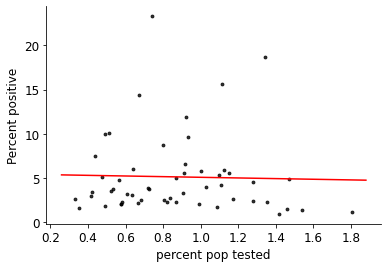

In [217]:
X_train = df[["percent pop tested"]].values.reshape(-1,1)
y_train = df[["percent positive"]].values.reshape(-1,1)

r = LR()
r.fit(X_train, y_train)

slope = r.coef_[0]
intercept = r.intercept_

ax = get_ax()
df.plot.scatter(ax = ax, x = "percent pop tested", y = "percent positive", s = 8, color = 'black', alpha = .8)
ax.set_ylabel("Percent positive")
y0 = ax.get_xlim()[0] * slope + intercept
y1 = ax.get_xlim()[1] * slope + intercept
plt.plot(ax.get_xlim(),[y0,y1], color = 'red')
# ax.set_xlim(-7)
# ax.set_ylim(0)

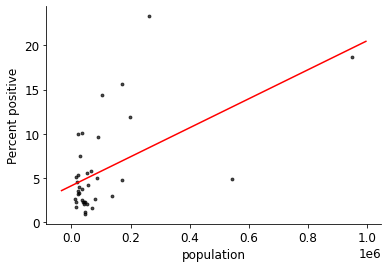

In [218]:
X_train = train[["population"]].values.reshape(-1,1)
y_train = train[["percent positive"]].values.reshape(-1,1)

r.fit(X_train, y_train)

slope = r.coef_[0]
intercept = r.intercept_

ax = get_ax()
train.plot.scatter(ax = ax, x = "population", y = "percent positive", s = 8, color = 'black', alpha = .7)
ax.set_ylabel("Percent positive")
y0 = ax.get_xlim()[0] * slope + intercept
y1 = ax.get_xlim()[1] * slope + intercept
plt.plot(ax.get_xlim(),[y0,y1], color = 'red')


In [219]:
X_test = test[["population"]].values.reshape(-1,1)
y_test = test[["percent positive"]].values.reshape(-1,1)

y_pred_train = r.predict(X_train)
y_pred_test = r.predict(X_test)

explained_variance_score(y_train, y_pred_train), explained_variance_score(y_test, y_pred_test) 

(0.30180521623877155, 0.5284357008100911)

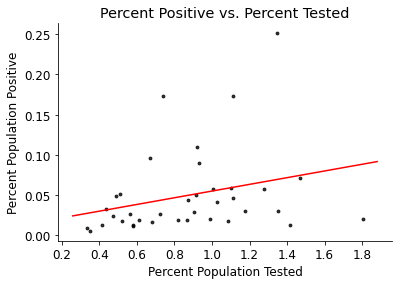

In [308]:
X_train = train[["percent pop tested"]].values.reshape(-1,1)
y_train = train[["percent pop pos"]].values.reshape(-1,1)

r.fit(X_train, y_train)

slope = r.coef_[0]
intercept = r.intercept_
matplotlib.rcParams["font.size"] = 12

ax = get_ax()
train.plot.scatter(ax = ax, x = "percent pop tested", y = "percent pop pos", s = 8, color = 'black', alpha = .8)
ax.set_ylabel("Percent population positive")
y0 = ax.get_xlim()[0] * slope + intercept
y1 = ax.get_xlim()[1] * slope + intercept
plt.plot(ax.get_xlim(),[y0,y1], color = 'red')
ax.set_title("Percent Positive vs. Percent Tested")
ax.set_xlabel("Percent Population Tested")
ax.set_ylabel("Percent Population Positive")
# ax.get_figure().savefig("regression_tested.svg", bbox_inches="tight")

In [221]:
X_test = test[["percent pop tested"]].values.reshape(-1,1)
y_test = test[["percent pop pos"]].values.reshape(-1,1)

y_pred_train = r.predict(X_train)
y_pred_test = r.predict(X_test)

explained_variance_score(y_train, y_pred_train), explained_variance_score(y_test, y_pred_test) 

(0.07835498433931232, -0.026459814506519574)

In [222]:
#outliers are densely populated cities like Milwaukee
slope

array([0.04162123])

array([6.34821934e-05])

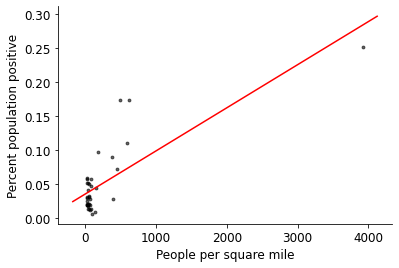

In [223]:
X_train = train[["pop density"]].values.reshape(-1,1)
y_train = train[["percent pop pos"]].values.reshape(-1,1)

r.fit(X_train, y_train)

slope = r.coef_[0]
intercept = r.intercept_

ax = get_ax()
train.plot.scatter(ax = ax, x = "pop density", y = "percent pop pos", s = 8, color = 'black', alpha = .6)
ax.set_ylabel("Percent population positive")
ax.set_xlabel("People per square mile")
y0 = ax.get_xlim()[0] * slope + intercept
y1 = ax.get_xlim()[1] * slope + intercept
plt.plot(ax.get_xlim(),[y0,y1], color = 'red')
# ax.get_figure().savefig("regression1.svg", bbox_inches="tight")
slope

In [224]:
#line is best fit for population density and percent population positive
X_test = test[["pop density"]].values.reshape(-1,1)
y_test = test[["percent pop pos"]].values.reshape(-1,1)

y_pred_train = r.predict(X_train)
y_pred_test = r.predict(X_test)

explained_variance_score(y_train, y_pred_train), explained_variance_score(y_test, y_pred_test) 

(0.6130938222242548, 0.3832044478814317)

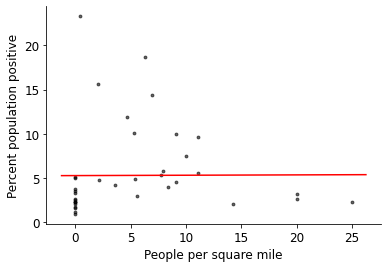

In [225]:
#trivial exmaple?
X_train = train[["percent positive"]].values.reshape(-1,1)
y_train = train[["percent deaths"]].values.reshape(-1,1)

r.fit(X_train, y_train)

slope = r.coef_[0]
intercept = r.intercept_

ax = get_ax()
train.plot.scatter(ax = ax, x = "percent deaths", y = "percent positive", s = 8, color = 'black', alpha = .6)
ax.set_ylabel("Percent population positive")
ax.set_xlabel("People per square mile")
y0 = ax.get_xlim()[0] * slope + intercept
y1 = ax.get_xlim()[1] * slope + intercept
plt.plot(ax.get_xlim(),[y0,y1], color = 'red')

In [275]:
df = df.sort_values(by=['percent pop pos'], ascending=False)
top8 = df.iloc[:10,:] #Really top 10 but too lazy to fix. Bad variable name choice really
# df['percent negative'] = 100 -df['percent positive']


In [276]:
top8 = top8.set_index('name')

In [277]:
#top 8 most
top8 = top8[['percent pop tested','percent pop pos','percent pop dead']]
top8 = top8.rename(columns={"percent pop tested": "Tested", "percent pop pos": "Positive","percent pop dead":"dead"}) 


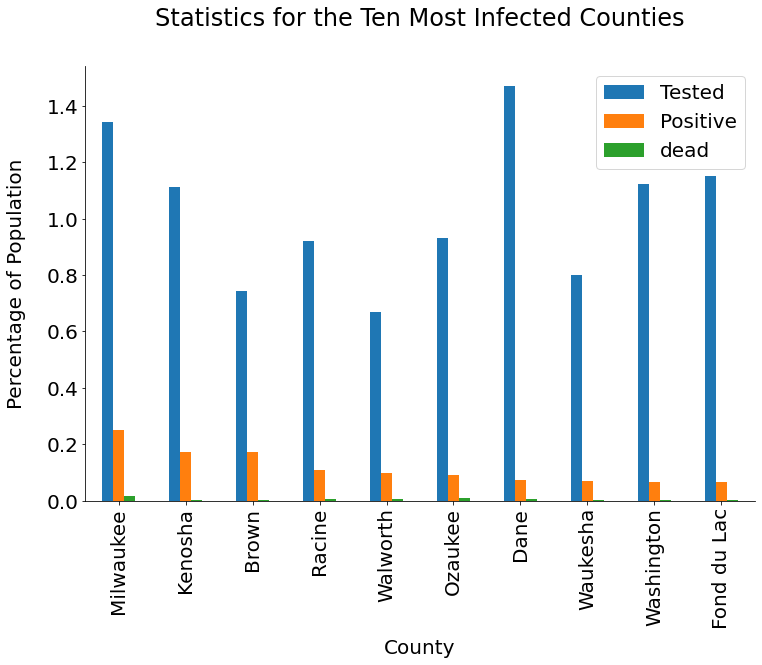

In [303]:
matplotlib.rcParams["font.size"] = 20
ax = get_ax()
top8.plot(kind = 'bar', ax=ax, figsize=(12, 8))
ax.set_ylabel("Percentage of Population", labelpad =20)
ax.set_xlabel("County", labelpad=10)
ax.set_title("Statistics for the Ten Most Infected Counties", pad = 40)
ax.legend(loc='upper right')
# ax.get_figure().savefig("clustered.svg", bbox_inches="tight")


In [305]:
df

,name,positive,negative,deaths,total tests,percent positive,percent deaths,geometry,population,percent pop pos,percent pop tested,percent pop dead,pop density
0,Milwaukee,2382.0,10359.0,150.0,12741,18.695550,6.294587,MULTIPOLYGON (((-88.0038199976383 43.192589052...,948201,0.251213,1.343702,0.015819,3927.924606
3,Kenosha,294.0,1588.0,6.0,1882,15.621679,2.033898,MULTIPOLYGON (((-88.08397896563579 42.66991396...,169290,0.173666,1.111702,0.003544,622.412589
1,Brown,455.0,1499.0,2.0,1954,23.285568,0.438596,MULTIPOLYGON (((-88.2501192432117 44.679782277...,263378,0.172756,0.741899,0.000759,497.211682
5,Racine,215.0,1592.0,10.0,1807,11.898174,4.629630,"POLYGON ((-87.8263041676683 42.8422370717163, ...",196584,0.109368,0.919200,0.005087,591.230075
6,Walworth,100.0,595.0,7.0,695,14.388489,6.930693,"POLYGON ((-88.3063900494772 42.8421029780855, ...",103718,0.096415,0.670086,0.006749,186.835516
9,Ozaukee,80.0,749.0,9.0,829,9.650181,11.111111,"POLYGON ((-87.7918593101445 43.5430288904909, ...",89147,0.089739,0.929925,0.010096,382.473829
2,Dane,387.0,7581.0,21.0,7968,4.856928,5.412371,"POLYGON ((-89.0091453050261 43.2848380086325, ...",542364,0.071354,1.469124,0.003872,453.011927
4,Waukesha,280.0,2944.0,14.0,3224,8.684864,4.982206,"POLYGON ((-88.4179931201656 43.1947050295068, ...",403072,0.069466,0.799857,0.003473,733.431592
8,Washington,90.0,1435.0,4.0,1525,5.901639,4.395604,"POLYGON ((-88.16087908383609 43.5429511014194,...",135693,0.066326,1.123860,0.002948,315.052241
10,Fond du Lac,66.0,1120.0,3.0,1186,5.564924,4.477612,"POLYGON ((-88.16228012330269 43.8915191576969,...",103066,0.064037,1.150719,0.002911,143.236745
